In [3]:
pip install unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1281 sha256=3f64deb23f30415eb32e8e7722e9ab4740f69460ba56134f5eee916872980f79
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip


In [4]:
! python -m pip install chembl_webresource_client
! python -m pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [6]:
# find target protein for acetylcholinesterase

target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
print(targets)

   cross_references                   organism  \
0                []    Drosophila melanogaster   
1                []               Homo sapiens   
2                []        Torpedo californica   
3                []               Mus musculus   
4                []          Rattus norvegicus   
5                []   Electrophorus electricus   
6                []                 Bos taurus   
7                []             Bemisia tabaci   
8                []  Leptinotarsa decemlineata   
9                []     Nephotettix cincticeps   
10               []              Gallus gallus   
11               []                Danio rerio   
12               []            Musca domestica   
13               []          Anopheles gambiae   
14               []               Homo sapiens   
15               []        Plutella xylostella   
16               []            Musca domestica   
17               []  Pediculus humanus capitis   
18               []          Spodoptera litura   


In [7]:
# selecting the first target protein
selected_target = targets.target_chembl_id[1] # selcting human as target orgnanism

# Here, we will retrieve only bioactivity data for Human Acetylcholinesterase (CHEMBL220) that are reported as pChEMBL values.
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [8]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]

In [10]:
# drop duplicates, smiles is for chemical compound
df2_nr = df2.drop_duplicates(['canonical_smiles'])

In [11]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]

In [12]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

Label compound as active/inactive

In [13]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')


bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")


bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.00,inactive
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.00,inactive
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.00,intermediate
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.00,inactive


In [14]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)


In [15]:
! zip acetylcholinesterase.zip *.csv

  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)


In [16]:
! pip install chmod
! pip install bash
! pip install conda
! pip install pandas
! pip install rdkit
! pip install seaborn
! pip install matplotlib
! pip install scipy

  Preparing metadata (setup.py) ... done
  Created wheel for bash: filename=bash-0.6-py3-none-any.whl size=2982 sha256=592093dd40678e5be20f296f643757093c32d3e3d034e4d18447b8dd20edb84a
  Stored in directory: /root/.cache/pip/wheels/a0/54/54/fb27ee0212967eeeb5338bdae28e6204ea057fd0a21c1efddd
Successfully built bash
ERROR: Ignored the following yanked versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16
ERROR: Could not find a version that satisfies the requirement conda (from versions: none)
ERROR: No matching distribution found for conda
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 38.7 MB/s eta 0:00:00


In [17]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
import pandas as pd

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-05-17 22:33:46--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   118MB/s    in 0.7s    

2025-05-17 22:33:46 (118 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [18]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')

In [19]:
df_no_smiles = df.drop(columns='canonical_smiles')


smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')


df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
print(df_clean_smiles.head())

  molecule_chembl_id  standard_value     class  \
0       CHEMBL133897          750.00    active   
1       CHEMBL336398          100.00    active   
2       CHEMBL131588        50000.00  inactive   
3       CHEMBL130628          300.00    active   
4       CHEMBL130478          800.00    active   

                                    canonical_smiles  
0              CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1  
1         O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1  
2  CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1  
3      O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F  
4          CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C  


Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

Descriptors.MolWt: Calculates the molecular weight.
Descriptors.MolLogP: Computes the octanol-water partition coefficient (logP).
Lipinski.NumHDonors: Determines the number of hydrogen bond donors.
Lipinski.NumHAcceptors: Determines the number of hydrogen bond acceptors

In [20]:
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

# concat lpinski data to original data frame so each smiles is associated its lipinski data
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_combined = pd.concat([df,df_lipinski], axis=1)

df_combined.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.33,2.80,0.00,6.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.91,4.55,0.00,5.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.85,5.36,0.00,5.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.85,4.71,0.00,5.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.33,3.10,0.00,6.00
5,CHEMBL130112,CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1,2400.00,intermediate,338.44,4.08,0.00,5.00
6,CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,100.00,active,296.78,2.85,0.00,5.00
7,CHEMBL337486,CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1,50000.00,inactive,408.96,4.57,0.00,6.00
8,CHEMBL336538,COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1,800.00,active,292.36,2.21,0.00,6.00
9,CHEMBL131051,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1,50000.00,inactive,408.41,4.67,0.00,6.00


## Convert ic50 to pc1c50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

In [21]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop(['standard_value_norm'], axis=1, inplace=False)

    return x


# before parsing we want to norm ic50 value since it can be as large as 10^8
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(['standard_value'], axis=1, inplace=False)

    return x

df_norm = norm_value(df_combined)
df_pIC50 = pIC50(df_norm)

In [22]:
#Removing the 'intermediate' bioactivity class
# Here, we will be removing the intermediate class from our data set.

df_pIC50.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df_final = df_pIC50[df_pIC50['class'] != 'intermediate']
df_final.to_csv('acetylcholinesterase_05_bioactivity_data_3class_pIC50.csv')

## Plots and statistical significance

Text(0, 0.5, 'pIC50 value')

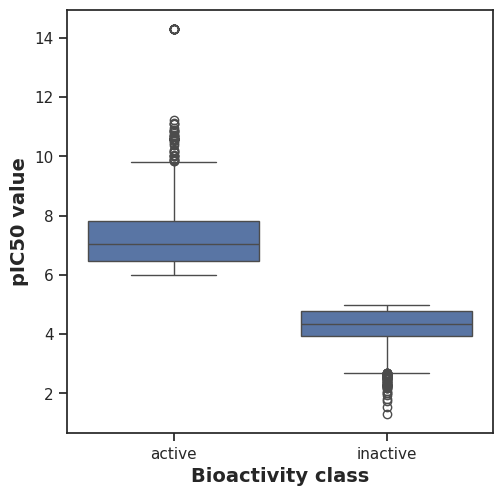

In [23]:
# plotting pc150 in boxplot

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

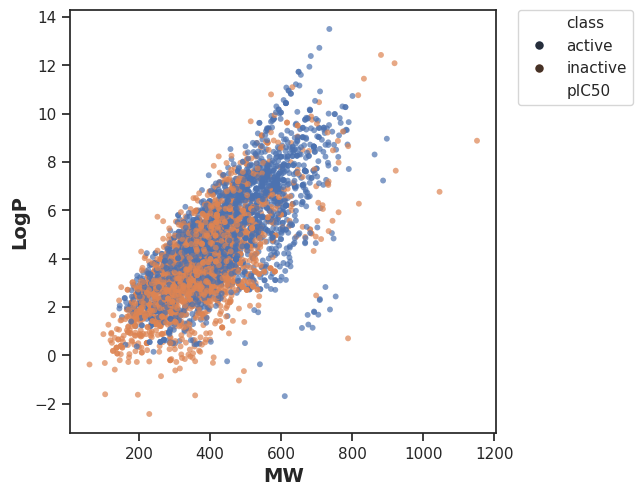

In [24]:
# plotting molecular weight in scatter plot

plt.figure(figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [25]:
# mann-whiteny u test for stastical analysis
def mannwhitney(descriptor, df_final, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

  # seed the random number generator
  seed(1)

  # actives and inactives
  selection = [descriptor, 'class']
  df = df_final[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_final[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

  # compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [26]:
all_statistical_res = []
columns_to_test = ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
for col in columns_to_test:
    result = mannwhitney(col, df_final)  # Assuming mannwhitney function returns a dictionary or tuple with stats
    all_statistical_res.append({"Column": col, **result})  # Combine column name with the test result

# Convert the results into a structured DataFrame
statistical_res_df = pd.DataFrame(all_statistical_res)

# Display the result
print(statistical_res_df)

          Column                                         Descriptor  \
0          pIC50         0    pIC50
Name: Descriptor, dtype: object   
1             MW            0    MW
Name: Descriptor, dtype: object   
2           LogP          0    LogP
Name: Descriptor, dtype: object   
3     NumHDonors    0    NumHDonors
Name: Descriptor, dtype: object   
4  NumHAcceptors  0    NumHAcceptors
Name: Descriptor, dtype: ob...   

                                        Statistics  \
0  0   6105400.00
Name: Statistics, dtype: float64   
1  0   3962948.00
Name: Statistics, dtype: float64   
2  0   4062609.50
Name: Statistics, dtype: float64   
3  0   3452343.00
Name: Statistics, dtype: float64   
4  0   3285782.00
Name: Statistics, dtype: float64   

                                  p                                 alpha  \
0  0   0.00
Name: p, dtype: float64  0   0.05
Name: alpha, dtype: float64   
1  0   0.00
Name: p, dtype: float64  0   0.05
Name: alpha, dtype: float64   
2  0   0.00
Name:

In [27]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')


In [28]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget -O https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2025-05-17 22:42:55--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-05-17 22:42:55--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   161MB/s    in 0.2s    

2025-05-17 22:42:55 (161 MB/s) - ‘padel.zip’ saved [25768637/25768637]

wget: missing URL
Usage: wget [OPTION].

In [29]:
# prepare paDEL input file
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


## Calculate Fingerprints Descriptor  
using padel descriptor

In [30]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

! cat padel.sh #padel.sh is looking at your ./dir for .smi, .sdf, .mol2, or .pdb as input file. therefore molecules.smi is automatically taken as input file

--2025-05-17 22:42:56--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh [following]
--2025-05-17 22:42:56--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: ‘padel.sh’

padel.sh            100%[===================>]     231  --.-KB/s    in 0s      

2025-05-17 22:42:56 (4.17 MB/s) - ‘padel.sh’ saved [231/231]

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/P

## Preparing the X and Y data matrix for input to our machine learning model
X will be the fingerprint descriptor and Y will be the pIC50 value for each molecule in the boactivity dataset

In [31]:
! java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv

df3_X = pd.read_csv('descriptors_output.csv')
df3_X.head()

Streaming output truncated to the last 5000 lines.
Processing CHEMBL1083972 in molecule.smi (1644/6642). Average speed: 0.22 s/mol.
Processing CHEMBL1084784 in molecule.smi (1646/6642). Average speed: 0.22 s/mol.
Processing CHEMBL1086184 in molecule.smi (1645/6642). Average speed: 0.22 s/mol.
Processing CHEMBL1085758 in molecule.smi (1648/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1085759 in molecule.smi (1647/6642). Average speed: 0.22 s/mol.
Processing CHEMBL1085026 in molecule.smi (1650/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1084785 in molecule.smi (1649/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1084167 in molecule.smi (1652/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1085027 in molecule.smi (1651/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1085028 in molecule.smi (1654/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1082427 in molecule.smi (1653/6642). Average speed: 0.21 s/mol.
Processing CHEMBL1085284 in molecule.smi (1656/6642). Aver

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df3_X = df3_X.drop(columns=['Name'])
df3_X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df3_Y = df3['pIC50']


In [34]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3.head()

dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)


## Regression model

In [58]:
! pip install lightgbm==3.3.2
! pip install lazypredict
! pip install sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.feature_selection import VarianceThreshold
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns


ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [70]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')


X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [71]:
# Remove low variance features
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [72]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Y_train

,pIC50
618,2.43
3839,5.07
2451,9.52
2646,4.58
1945,9.28
...,...
4426,4.51
466,4.00
3092,5.09
3772,5.98


In [73]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


In [74]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.86,0.86,0.57,0.17
DecisionTreeRegressor,0.86,0.86,0.57,0.20
ExtraTreesRegressor,0.86,0.86,0.57,6.29
GaussianProcessRegressor,0.86,0.86,0.57,7.76
RandomForestRegressor,0.82,0.83,0.64,4.64
XGBRegressor,0.82,0.83,0.65,0.71
BaggingRegressor,0.80,0.81,0.67,0.85
MLPRegressor,0.76,0.77,0.75,5.40
HistGradientBoostingRegressor,0.67,0.69,0.87,0.95


[(0.0, 1.0)]

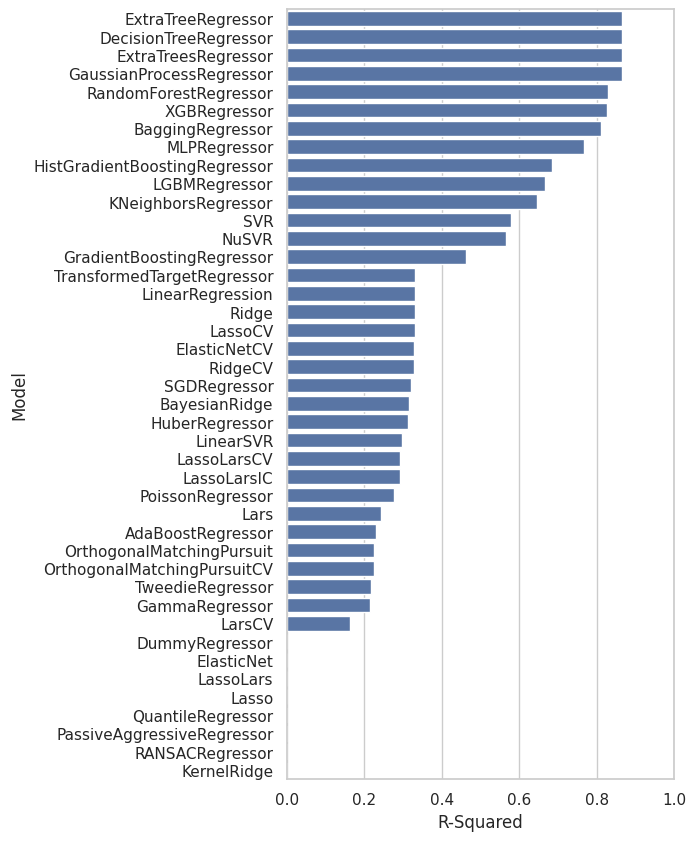

In [75]:
# bar plot of R-Squared values for the diff regressor models. R-squared values measures the proportion of the variance in the target variable that is explained by the model.
# Range from - infinity to + 1
# R ^2 = 1, model is perfect
# R^2 = 0, model is no better than mean of target variable
# R^2 < 0, worse than simply prediciting the mean

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

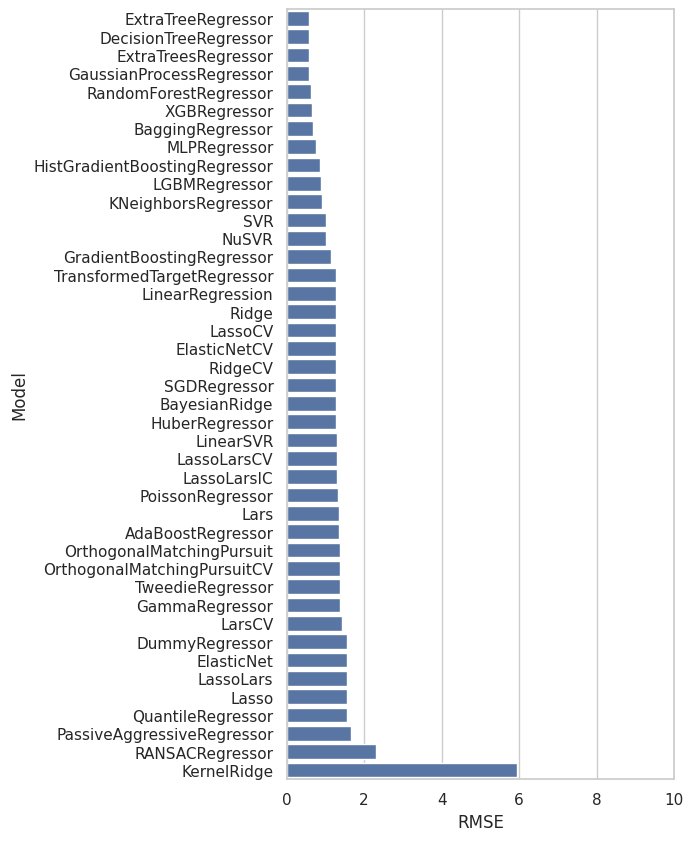

In [76]:
# bar plot of RMSE values for the diff regressor models.  RMSE measures the average magnitude of errors in the model's predictions, expressed in the same units as the target variable.
# lower rmse means model is more accurate
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))